# MA3K7 - Big Mini Project Code
## 2106657

In [86]:
# Necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy as sp

# A Stats package that uses scipy as a basis - necessary to test for exponential distribution 
import statsmodels.api as sm

### Part 1: Finding the possible ending species when we start with AABBC

In [118]:
# array to store all the end species
tally = []

# function which will take a random pair from box and do the correct collision 
def collision(box, n):
    
    choice = random.choices(box, k = 2)
    choice1 = choice[0]
    choice2 = choice[1]

# if it is a collision between distinct species then n increases, the values are removed and the other particles is added
    if choice1 + choice2 == "AB" or choice1 + choice2 == "BA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("C")
        box.append("C")
        n = n + 1
        
    elif choice1 + choice2 == "AC" or choice1 + choice2 == "CA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("B")
        box.append("B")
        n = n + 1
        
    elif choice1 + choice2 == "CB" or choice1 + choice2 == "BC":
        box.remove(choice1)
        box.remove(choice2)
        box.append("A")
        box.append("A")
        n = n + 1

    return box, n
for i in range(0,1000):
    
# array to represent the box (resets after each loop)
    box = ["A","A","B","B","C"]
    
# variable to record how many collisions between distinct occur 
    n = 0
    
# repeating the collision process until only like particles remain or we have 100 collisions
    while  all(i == box[0] for i in box) == False:
            box, n = collision(box, n)

    tally.append(box[0])

# returning the contents of the boxes after each of 100 distinct collisions
print("A",tally.count("A"),"B",tally.count("B"),"C",tally.count("C"))


A 0 B 0 C 1000


### Part 2: Listing the contents of the box after each of 100 collisions starting with AAABBC

In [119]:
# array to represent the box )
box = ["A","A","A","B","B","C"]

# variable to record how many collisions between distinct occur 
n = 0

# array to store the box after each collision to be returned at the end
all_box = [["A","A","A","B","B","C"]]

# an emty array to dump the values of the box into so we can record the value of box after each iteration
box_temp = []

# repeating the collision process until only like particles remain or we have 100 collisions
while  n<50:

# re-adding the values after an iteration to the box after emtying it (so it can be appended to total_box)
    box.extend(box_temp)

# selecting two  particles at random from the box
    choice = random.choices(box, k = 2)
    choice1 = choice[0]
    choice2 = choice[1]

# if it is a collision between distinct species then n increases, the values are removed and the other particles is added
    if choice1 + choice2 == "AB" or choice1 + choice2 == "BA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("C")
        box.append("C")

# setting the dummy list equal to the box and adding the box value to total_box
        box_temp = box
        all_box.append(box)
        n = n + 1
        
    elif choice1 + choice2 == "AC" or choice1 + choice2 == "CA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("B")
        box.append("B")
        box_temp = box
        all_box.append(box)
        n = n + 1
        
    elif choice1 + choice2 == "CB" or choice1 + choice2 == "BC":
        box.remove(choice1)
        box.remove(choice2)
        box.append("A")
        box.append("A")
        box_temp = box
        all_box.append(box)
        n = n + 1

# same process is needed even if the box isnt changed as it gets meptied regardless
    else:
        box_temp = box

# resetting the box so the value after each iteration can be recorded
    box = []
        
    
# returning the contents of the boxes after each of 50 distinct collisions
print(all_box)

[['A', 'A', 'A', 'B', 'B', 'C'], ['A', 'A', 'B', 'B', 'B', 'B'], ['A', 'B', 'B', 'B', 'C', 'C'], ['B', 'B', 'C', 'C', 'C', 'C'], ['B', 'C', 'C', 'C', 'A', 'A'], ['C', 'C', 'C', 'A', 'C', 'C'], ['C', 'C', 'C', 'C', 'B', 'B'], ['C', 'C', 'C', 'B', 'A', 'A'], ['C', 'C', 'A', 'A', 'A', 'A'], ['C', 'A', 'A', 'A', 'B', 'B'], ['C', 'A', 'A', 'B', 'C', 'C'], ['C', 'A', 'C', 'C', 'C', 'C'], ['C', 'C', 'C', 'C', 'B', 'B'], ['C', 'C', 'C', 'B', 'A', 'A'], ['C', 'C', 'A', 'A', 'A', 'A'], ['C', 'A', 'A', 'A', 'B', 'B'], ['A', 'A', 'A', 'B', 'A', 'A'], ['A', 'A', 'A', 'A', 'C', 'C'], ['A', 'A', 'A', 'C', 'B', 'B'], ['A', 'A', 'C', 'B', 'C', 'C'], ['A', 'A', 'C', 'C', 'A', 'A'], ['A', 'C', 'A', 'A', 'B', 'B'], ['C', 'A', 'A', 'B', 'C', 'C'], ['A', 'B', 'C', 'C', 'B', 'B'], ['A', 'C', 'B', 'B', 'A', 'A'], ['C', 'B', 'A', 'A', 'C', 'C'], ['B', 'A', 'C', 'C', 'B', 'B'], ['A', 'C', 'B', 'B', 'A', 'A'], ['C', 'B', 'A', 'A', 'C', 'C'], ['A', 'A', 'C', 'C', 'A', 'A'], ['A', 'C', 'A', 'A', 'B', 'B'], ['C', '

### Part 3: Investigating how populations of species vary with n (when an end is not possible)

#### Part 3A: When populations start relatively equal

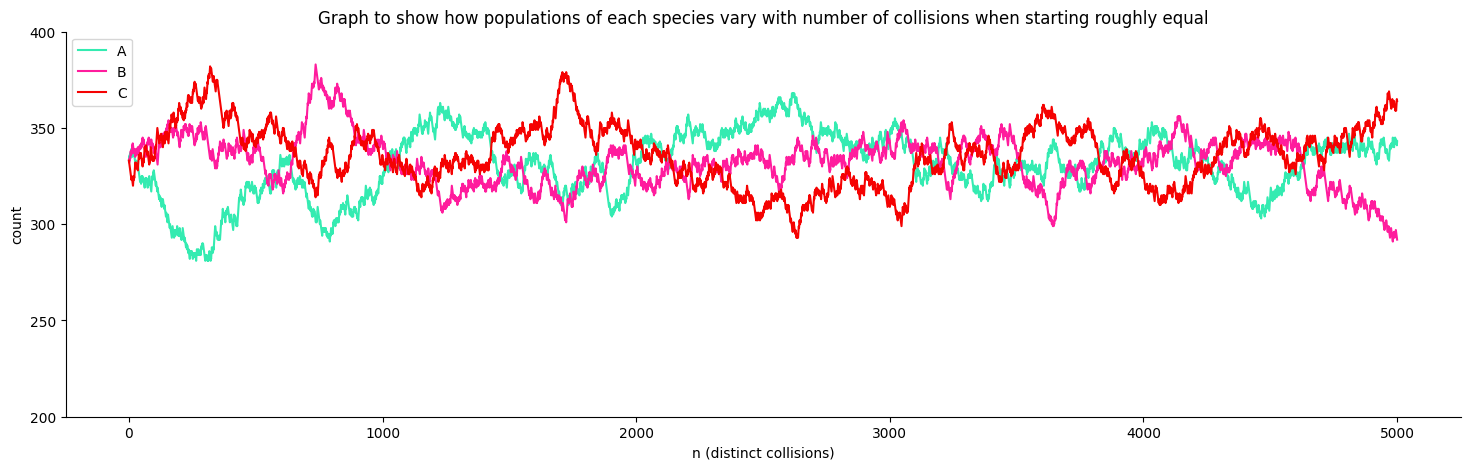

In [21]:
# generating our initiaL box using simple for loops for fixed values of each population
counta = 333
countb  = 334
countc = 335

box = []

for i in range(0,counta):
    box.append("A")

for i in range(0,countb):
    box.append("B")

for i in range(0,countc):
    box.append("C")

# arrays to store the populations of A,B and C after each collision respectively
apop = [counta]
bpop = [countb]
cpop = [countc]

# variable to record how many collisions between distinct occur 
n = 0

# an emty array to dump the values of the box into so we can record the value of box after each iteration
box_temp = []


# repeating the collision process until only like particles remain or we have 100 collisions
while  n<5000:

# selecting two  particles at random from the box
    choice = random.choices(box, k = 2)
    choice1 = choice[0]
    choice2 = choice[1]

# if it is a collision between distinct species then n increases, the values are removed and the other particles is added
    if choice1 + choice2 == "AB" or choice1 + choice2 == "BA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("C")
        box.append("C")

# adding the populations to the corresponding array after each collision
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))

        n = n + 1
        
    elif choice1 + choice2 == "AC" or choice1 + choice2 == "CA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("B")
        box.append("B")
        
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))
        
        n = n + 1
        
    elif choice1 + choice2 == "CB" or choice1 + choice2 == "BC":
        box.remove(choice1)
        box.remove(choice2)
        box.append("A")
        box.append("A")
        
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))
        
        n = n + 1

n_graph = np.arange(0,5001,1)

fig, ax = plt.subplots(figsize = (18,5))
ax.plot(n_graph, apop, color = '#34ebb1', label = 'A')
ax.plot(n_graph, bpop, color = '#ff1c9d', label = 'B')
ax.plot(n_graph, cpop, color = '#f50202', label = 'C')

#various visual elements to make the grpah stand out more
plt.xlabel("n (distinct collisions)")
plt.ylabel("count")
plt.yticks(np.arange(200,450,50))
plt.title("Graph to show how populations of each species vary with number of collisions when starting roughly equal")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()

#### Part 3B: When A $\approx$ B > C

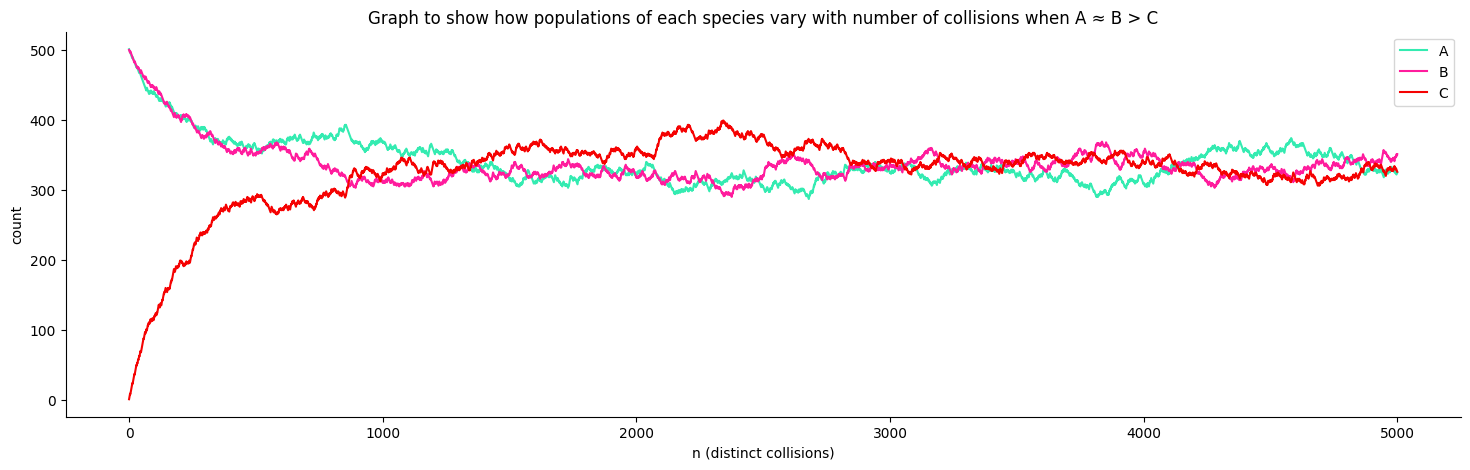

In [17]:
# generating our initiaL box using simple for loops for fixed values of each population
counta = 501
countb  = 500
countc = 1

box = []

for i in range(0,counta):
    box.append("A")

for i in range(0,countb):
    box.append("B")

for i in range(0,countc):
    box.append("C")

# arrays to store the populations of A,B and C after each collision respectively
apop = [counta]
bpop = [countb]
cpop = [countc]

# variable to record how many collisions between distinct occur 
n = 0

# an emty array to dump the values of the box into so we can record the value of box after each iteration
box_temp = []


# repeating the collision process until only like particles remain or we have 100 collisions
while  n<5000:

# selecting two  particles at random from the box
    choice = random.choices(box, k = 2)
    choice1 = choice[0]
    choice2 = choice[1]

# if it is a collision between distinct species then n increases, the values are removed and the other particles is added
    if choice1 + choice2 == "AB" or choice1 + choice2 == "BA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("C")
        box.append("C")

# adding the populations to the corresponding array after each collision
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))

        n = n + 1
        
    elif choice1 + choice2 == "AC" or choice1 + choice2 == "CA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("B")
        box.append("B")
        
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))
        
        n = n + 1
        
    elif choice1 + choice2 == "CB" or choice1 + choice2 == "BC":
        box.remove(choice1)
        box.remove(choice2)
        box.append("A")
        box.append("A")
        
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))
        
        n = n + 1

n_graph = np.arange(0,5001,1)

fig, ax = plt.subplots(figsize = (18,5))
ax.plot(n_graph, apop, color = '#34ebb1', label = 'A')
ax.plot(n_graph, bpop, color = '#ff1c9d', label = 'B')
ax.plot(n_graph, cpop, color = '#f50202', label = 'C')

#various visual elements to make the grpah stand out more
plt.xlabel("n (distinct collisions)")
plt.ylabel("count")
plt.title("Graph to show how populations of each species vary with number of collisions when A \u2248 B > C")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()

#### Part 3C: When A > B > C

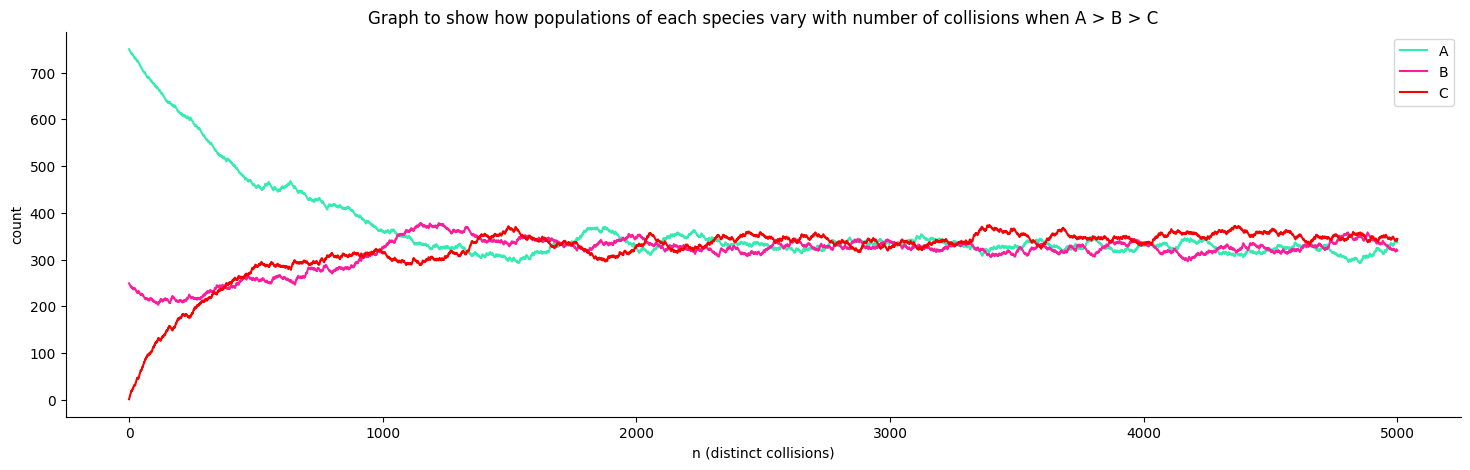

In [19]:
# generating our initiaL box using simple for loops for fixed values of each population
counta = 750
countb  = 249
countc = 1

box = []

for i in range(0,counta):
    box.append("A")

for i in range(0,countb):
    box.append("B")

for i in range(0,countc):
    box.append("C")

# arrays to store the populations of A,B and C after each collision respectively
apop = [counta]
bpop = [countb]
cpop = [countc]

# variable to record how many collisions between distinct occur 
n = 0

# an emty array to dump the values of the box into so we can record the value of box after each iteration
box_temp = []


# repeating the collision process until only like particles remain or we have 100 collisions
while  n<5000:

# selecting two  particles at random from the box
    choice = random.choices(box, k = 2)
    choice1 = choice[0]
    choice2 = choice[1]

# if it is a collision between distinct species then n increases, the values are removed and the other particles is added
    if choice1 + choice2 == "AB" or choice1 + choice2 == "BA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("C")
        box.append("C")

# adding the populations to the corresponding array after each collision
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))

        n = n + 1
        
    elif choice1 + choice2 == "AC" or choice1 + choice2 == "CA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("B")
        box.append("B")
        
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))
        
        n = n + 1
        
    elif choice1 + choice2 == "CB" or choice1 + choice2 == "BC":
        box.remove(choice1)
        box.remove(choice2)
        box.append("A")
        box.append("A")
        
        apop.append(box.count("A"))
        bpop.append(box.count("B"))
        cpop.append(box.count("C"))
        
        n = n + 1

n_graph = np.arange(0,5001,1)

fig, ax = plt.subplots(figsize = (18,5))
ax.plot(n_graph, apop, color = '#34ebb1', label = 'A')
ax.plot(n_graph, bpop, color = '#ff1c9d', label = 'B')
ax.plot(n_graph, cpop, color = '#f50202', label = 'C')

#various visual elements to make the grpah stand out more
plt.xlabel("n (distinct collisions)")
plt.ylabel("count")
plt.title("Graph to show how populations of each species vary with number of collisions when A > B > C")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()

### Part 4: Exploring how many collisions occur before an end for different P

#### 4A: Generating the data for P = 15 and plotting histogram

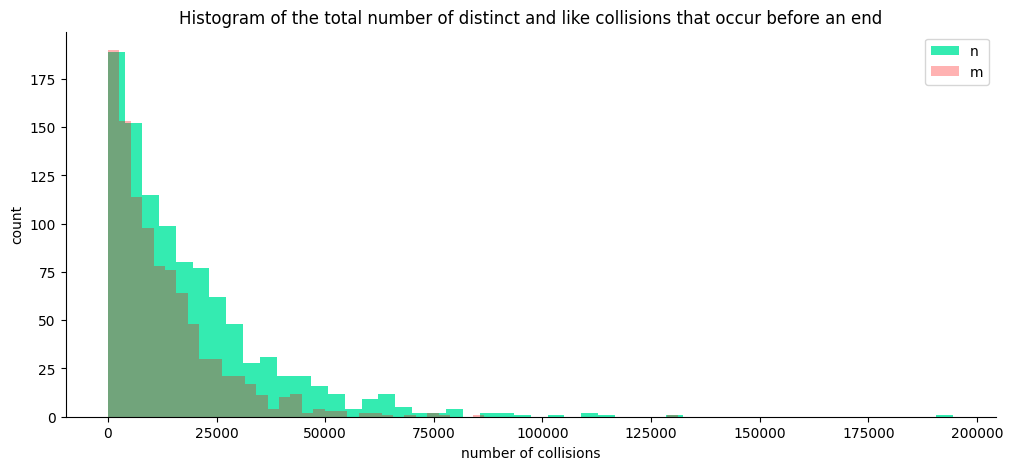

In [115]:
# arrays to store n and m counts after each iteration
ncount = []
mcount = []

# function which will take a random pair from box and do the correct collision 
def collision(box, n, m):
    
    choice = random.choices(box, k = 2)
    choice1 = choice[0]
    choice2 = choice[1]

# if it is a collision between distinct species then n increases, the values are removed and the other particles is added
    if choice1 + choice2 == "AB" or choice1 + choice2 == "BA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("C")
        box.append("C")
        n = n + 1
        
    elif choice1 + choice2 == "AC" or choice1 + choice2 == "CA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("B")
        box.append("B")
        n = n + 1
        
    elif choice1 + choice2 == "CB" or choice1 + choice2 == "BC":
        box.remove(choice1)
        box.remove(choice2)
        box.append("A")
        box.append("A")
        n = n + 1

    else:
        m = m + 1

    return box, n, m

# repeating the experiment a statistically significant number of times as we are going to be looking at distribution
for i in range(0,1000):
    
# array to represent the box (resets after each loop)
    box = ["A","A","A","A","A","B","B","B","B","B","C","C","C","C","C"]
    
# variable to record how many collisions between distinct occur 
    n = 0
    m = 0
    
# repeating the collision process until only like particles remain 
    while  all(i == box[0] for i in box) == False:
            box, n, m = collision(box, n, m)

    ncount.append(n)
    mcount.append(m)

# plotting a histogram for both n and m on same axes to view how they behave
fig, ax = plt.subplots(figsize = (12,5))
plt.hist(ncount, color = '#34ebb1', bins = 50, label = "n")
plt.hist(mcount,  color = '#ff0000', alpha = 0.3, bins = 50, label = "m")

#various visual elements to make the grpah stand out more
plt.xlabel("number of collisions")
plt.ylabel("count")
plt.title("Histogram of the total number of distinct and like collisions that occur before an end")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()



#### 4B: Adding exponential fit lines and testing if n and m are exponentially distributed

(0.0937044867859721, 0.4168832442361936)
(0.0962710770636146, 0.38081494584750714)


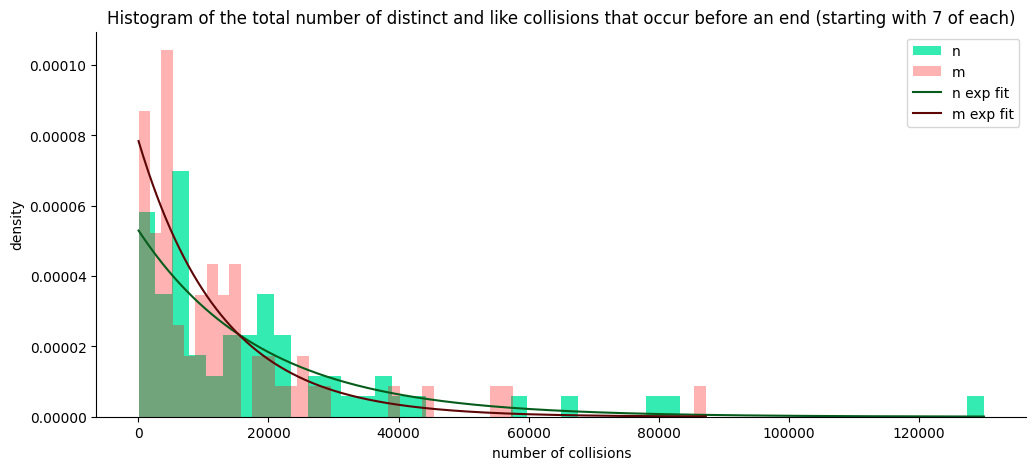

In [113]:
# plotting a histogram for both n and m on same axes to view how they behave
fig, ax = plt.subplots(figsize = (12,5))
plt.hist(ncount, color = '#34ebb1', bins = 50, label = "n", density = True)
plt.hist(mcount,  color = '#ff0000', alpha = 0.3, bins = 50, label = "m", density = True)

# adding an exponential fit line for both n and m to see how good a git it is
xn = np.linspace(min(ncount), max(ncount),1000)
expfitn = sp.stats.expon.pdf(xn, scale=np.mean(ncount))
ax.plot(xn, expfitn, color = '#065c1b', label = "n exp fit")

xm = np.linspace(min(mcount), max(mcount),1000)
expfitm = sp.stats.expon.pdf(xm, scale=np.mean(mcount))
ax.plot(xm, expfitm, color = '#5c0606', label = "m exp fit")


#various visual elements to make the grpah stand out more
plt.xlabel("number of collisions")
plt.ylabel("density")
plt.title("Histogram of the total number of distinct and like collisions that occur before an end (starting with 7 of each)")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()

# using the statsmodels package of SciPy to conducr Lilliefors test on the data (test is based on the K-S test for normality/exponentiality)
lilyn = sm.stats.diagnostic.lilliefors(ncount, dist = 'exp', pvalmethod = 'table')
lilym = sm.stats.diagnostic.lilliefors(mcount, dist = 'exp', pvalmethod = 'table')

# smaller p-value (2nd number) than 0.05 indicates theres a significant difference between data and exponentially distributed data
print(lilyn)
print(lilym)

#### 4C: Counting how many values of n lie in each power of 10

In [114]:
# Returning the count of total distinct collisions in the range of each power of 10
print("Magnitude 1:",sum(ncount.count(i) for i in range(0,10)))
print("Magnitude 10:",sum(ncount.count(i) for i in range(10,100)))
print("Magnitude 100:",sum(ncount.count(i) for i in range(100,1000)))
print("Magnitude 1000:",sum(ncount.count(i) for i in range(1000,10000)))
print("Magnitude 10000:",sum(ncount.count(i) for i in range(10000,100000)))
print("Magnitude 100000:",sum(ncount.count(i) for i in range(100000,1000000)))

Magnitude 1: 0
Magnitude 10: 1
Magnitude 100: 2
Magnitude 1000: 28
Magnitude 10000: 34
Magnitude 100000: 1


#### 4D: Logarithmic Histogram for n

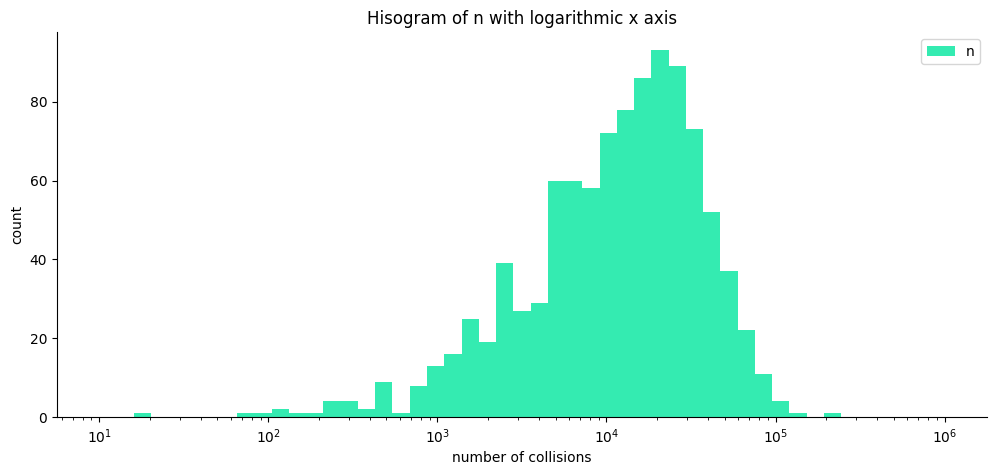

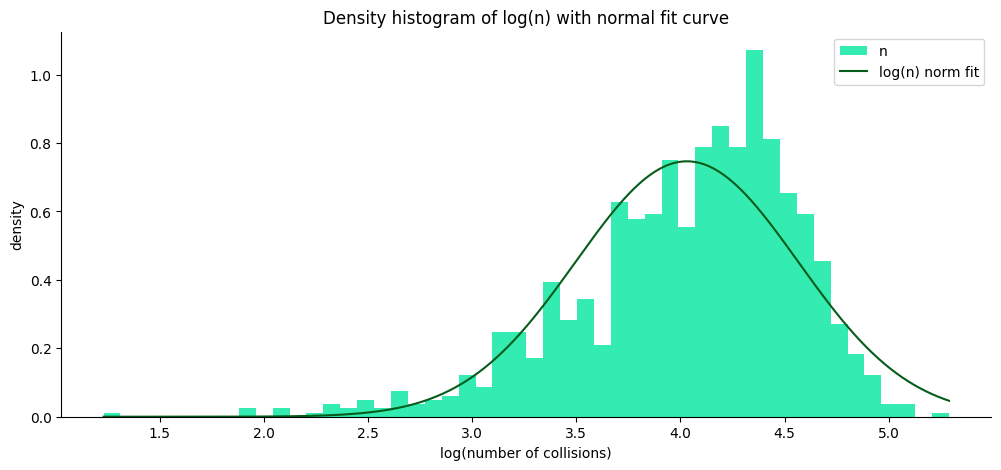

In [116]:
# histogram of ncount, but with a logarithmic x axis
fig, ax = plt.subplots(figsize = (12,5))
plt.hist(ncount, color = '#34ebb1', bins = np.logspace(np.log10(10),np.log10(1000000), 50), label = "n")

#various visual elements to make the grpah stand out more
plt.xlabel("number of collisions")
plt.ylabel("count")
plt.title("Hisogram of n with logarithmic x axis")
ax.spines[['right', 'top']].set_visible(False)
ax.set_xscale('log')
ax.legend()

# generating an array of log(n) to see if it follows normal distribution
nlog = np.log10(ncount)

# a normal fit curve for log(n)
xn = np.linspace(min(nlog), max(nlog),1000)
normfitn = sp.stats.norm.pdf(x = xn, scale = np.std(nlog), loc=np.mean(nlog))

# a density histogram of log9n) to test fit
fig, ax = plt.subplots(figsize = (12,5))
plt.hist(nlog, color = '#34ebb1', bins = 50, label = "n", density = True)

ax.plot(xn, normfitn, color = '#065c1b', label = "log(n) norm fit")
                             
#various visual elements to make the grpah stand out more
plt.xlabel("log(number of collisions)")
plt.ylabel("density")
plt.title("Density histogram of log(n) with normal fit curve")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()


### Extension 1: What happens when collisions reduce population

#### E1A: Varying total population size to observe how number of collisions and ending amount change

In [27]:
# The amount of each particle species we start with (all equal)
p_species = 100

# number of times for each pop. size the experiment is repeated
N = 1000

# arrays to record all the values of n, m and single pop. box size after N iterations
n_end_val = []
m_end_val = []
box_size = []


# function ehich will take a random pair from box and do the correct collision 
def collision(box, n, m):
    
    choice = random.choices(box, k = 2)
    choice1 = choice[0]
    choice2 = choice[1]

# if it is a collision between distinct species then n increases, the values are removed and the other particles is added
    if choice1 + choice2 == "AB" or choice1 + choice2 == "BA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("C")
        n = n + 1
        
    elif choice1 + choice2 == "AC" or choice1 + choice2 == "CA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("B")
        n = n + 1
        
    elif choice1 + choice2 == "CB" or choice1 + choice2 == "BC":
        box.remove(choice1)
        box.remove(choice2)
        box.append("A")
        n = n + 1

# if the particles are like then m is increased and nothing esle
    else:
        m = m + 1
            
    return box, n, m

# for loop to do repetitions
for j in range(0,N):

# variables to record how many collisions between distinct and like particles occur respectivley
    n = 0
    m = 0
    
# array which will have p_species of each of A,B and C in it
    box = []
    
# adding p_species amounts of A, B and C to box
    for i in range (0, p_species):
        box.append("A")
        box.append("B")
        box.append("C")
          
# repeating the collision process until only like particles remain
    while  all(i == box[0] for i in box) == False:
            box, n, m = collision(box, n, m)

# adding relevant values to relevant array
    n_end_val.append(n)
    m_end_val.append(m)
    box_size.append(len(box))

print(np.mean(n_end_val))
print(np.mean(m_end_val))
print(np.mean(box_size))

#print(n_end_val)
#print(m_end_val)
#print(box_size)

29997.554
15020.132
2.446


#### E1B: Plotting the populations of A, B and C against n when collisions reduce population

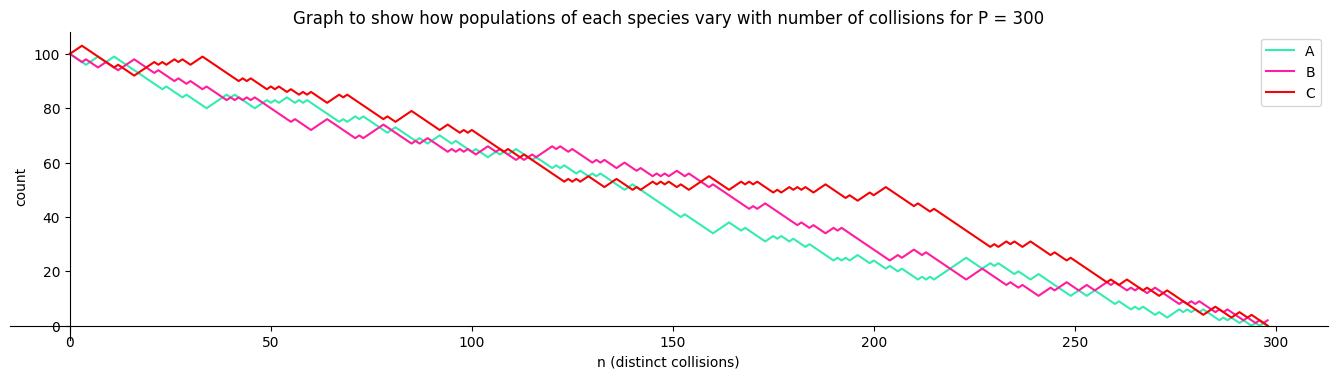

In [29]:
# The amount of each particle species we start with (all equal)
p_species = 100

# recording number of collisions of distinct particles
n = 0

# array which will have p_species of each of A,B and C in it
box = []

# arrays that will record the populations of each variable after every relevant collision
a_count = [p_species]
b_count = [p_species]
c_count = [p_species]

# adding p_species amounts of A, B and C to box
for i in range (0, p_species):
    box.append("A")
    box.append("B")
    box.append("C")

# function which will take a random pair from box and do the correct collision 
def collision(box, n):
    
    choice = random.choices(box, k = 2)
    choice1 = choice[0]
    choice2 = choice[1]

# if it is a collision between distinct species then n increases, the values are removed and the other particles is added
    if choice1 + choice2 == "AB" or choice1 + choice2 == "BA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("C")

# adding on the counts of each particle after each collision
        a_count.append(box.count("A"))
        b_count.append(box.count("B"))
        c_count.append(box.count("C"))
        
        n = n + 1
        
    elif choice1 + choice2 == "AC" or choice1 + choice2 == "CA":
        box.remove(choice1)
        box.remove(choice2)
        box.append("B")

        a_count.append(box.count("A"))
        b_count.append(box.count("B"))
        c_count.append(box.count("C"))
        
        n = n + 1
        
    elif choice1 + choice2 == "CB" or choice1 + choice2 == "BC":
        box.remove(choice1)
        box.remove(choice2)
        box.append("A")

        a_count.append(box.count("A"))
        b_count.append(box.count("B"))
        c_count.append(box.count("C"))
        
        n = n + 1
        
    return box, n, a_count, b_count, c_count

    
# repeating the collision process until only like particles remain
while  all(i == box[0] for i in box) == False:
    box, n, a_count, b_count, c_count = collision(box, n)

# making sure there isn't an issue with array sizes and n by giving each one its own corresponding array (purely for visual purposes)
n_plot_a = np.arange(0,len(a_count),1)
n_plot_b = np.arange(0,len(b_count),1)
n_plot_c = np.arange(0,len(c_count),1)

# plotting the populations of A,B and C against the number of collisions
fig, ax = plt.subplots(figsize = (17,4))
ax.plot(n_plot_a, a_count, color = '#34ebb1', label = 'A')
ax.plot(n_plot_b, b_count, color = '#ff1c9d', label = 'B')
ax.plot(n_plot_c, c_count, color = '#f50202', label = 'C')

#various visual elements to make the grpah stand out more
plt.xlabel("n (distinct collisions)")
plt.ylabel("count")
plt.title("Graph to show how populations of each species vary with number of collisions for P = 300")
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.legend()